# Homework 4 - Steven Vaught

* [Newman 7.1](#problem1)
* [Newman 7.3](#problem3)
* [Newman 7.4](#problem4)
* [Newman 7.8](#problem8)
* [Newman 7.9](#problem9)

# Newman 7.1 <a id='problem1'/>
### Part A
calculate the fourier transform of a square wave and plot the amplitudes
### Part B
Calculate the Fourier transform of a sawtooth wave and plot the amplitudes
### Part C
Calculate the Fourier transform of a modulated sine wave and plot the amplitudes

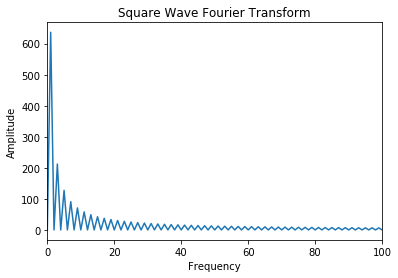

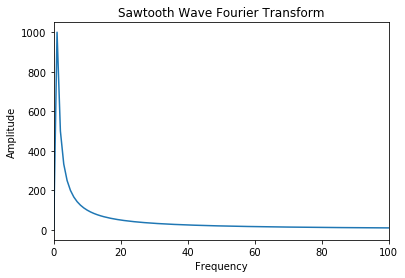

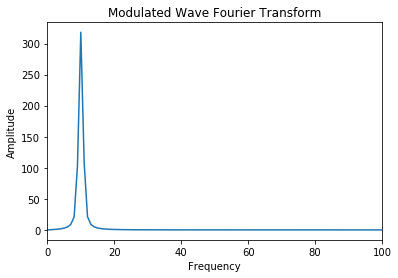

In [3]:
"""
Newman Problem 7.1

Fourier Transform of Simple Functions
"""
from numpy import zeros, loadtxt, linspace
import matplotlib.pyplot as plt
from cmath import exp, pi, sin

# Function declaration and sampling
N = 1000
xs = linspace(-1*pi, pi, N)
sqr_wave = [(lambda x: -1 if x < 0 else 1)(
    y) for y in xs]
sawtooth = [(lambda x: x)(
    y) for y in xs]
modulated = [(lambda x: sin(pi*(x+pi)/2/pi)*sin(20*pi*(x+pi)/2/pi))(
    y) for y in xs]

# DFT code from Newman
def dft(y):
    N = len(y)
    c = zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

# function for repetitive plotting
def plotstuff(dft_list, name):
    plt.plot(abs(dft_list))
    plt.title(name)
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.xlim(0,100)
    plt.show()

# plotting fourier transforms of waves
plotstuff(dft(sqr_wave), "Square Wave Fourier Transform")
plotstuff(dft(sawtooth), "Sawtooth Wave Fourier Transform")
plotstuff(dft(modulated), "Modulated Wave Fourier Transform")

# Newman 7.3 <a id='problem3'/>
### Part A
Write a program that loads a waveform from the two files given, and calculate the fourier transform of the waveform, and plots the magnitudes of the first 10000 coefficients.
### Part B
From the fourier transform results, calculate the musical note being played

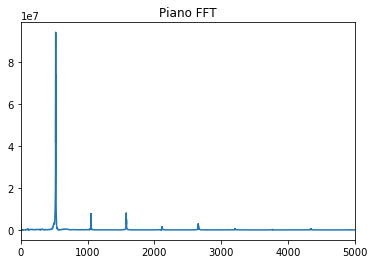

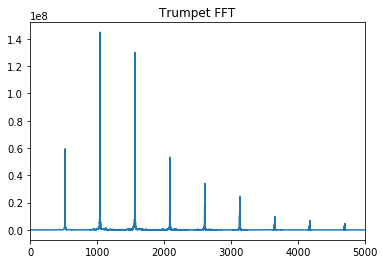


Max frequency played by piano: 525.231 Hz
Max frequency played by the trumpet: 1043.847 Hz


    Both max frequencies are roughly multiples of 261 Hz, 
    implying that both instruments are playing the note C, 
    just in different octaves.


In [8]:
"""
Newman Problem 7.3

Fourier transforms of musical instruments
"""
from numpy.fft import rfft, rfftfreq
import numpy as np
import matplotlib.pyplot as plt


# Loading waveform data into arrays
piano = np.loadtxt('piano.txt')
trumpet = np.loadtxt('trumpet.txt')

# fast fourier transforms
piano_fft = rfft(piano)
piano_freq = rfftfreq(len(piano), d = 1/44100.)
trumpet_fft = rfft(trumpet)
trumpet_freq = rfftfreq(len(trumpet), d = 1/44100.)

# plots of fourier transforms
plt.plot(piano_freq, abs(piano_fft))
plt.title('Piano FFT')
plt.xlim(0, 5000)
plt.show()
plt.plot(trumpet_freq, abs(trumpet_fft))
plt.title('Trumpet FFT')
plt.xlim(0, 5000)
plt.show()

max_piano_freq = piano_freq[np.argmax(piano_fft)]
max_trumpet_freq = piano_freq[np.argmax(trumpet_fft)]

print()
print(f'Max frequency played by piano: {max_piano_freq} Hz')
print(f'Max frequency played by the trumpet: {max_trumpet_freq} Hz')
print()
print("""
    Both max frequencies are roughly multiples of 261 Hz, 
    implying that both instruments are playing the note C, 
    just in different octaves.""")

# Newman 7.4 <a id='problem4'/>
### Part A
Read in dow.txt and plot it
### Part B
Calculate fourier transform
### Part C
Set all but first 10% of fourier coefficients to 0
### Part D
Calculate the inverse fourier transform and plot it with the original data
### Part E
Modify the program so that it sets all but the first 2% of coefficients to 0

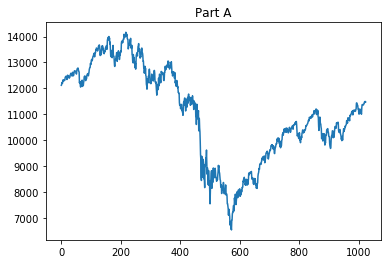

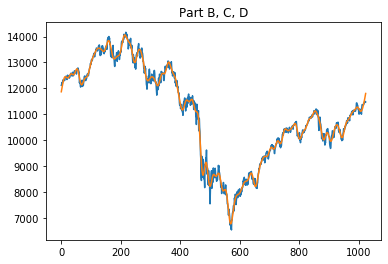

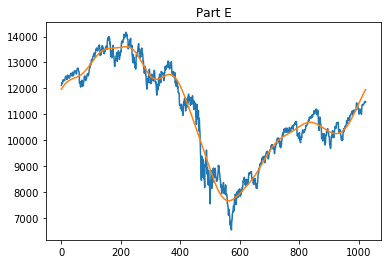

In [9]:
"""
Newman Problem 7.4

Fourier filtering and smoothing
"""
import numpy as np
from numpy.fft import rfft, irfft
import matplotlib.pyplot as plt


''' Part A +++++++++++++++++++++++++++++++++++++++++++++'''

# reading in dow data and plotting
dow = np.loadtxt('dow.txt')
plt.plot(dow)
plt.title("Part A")
plt.show()

''' Part B, C, D +++++++++++++++++++++++++++++++++++++++'''

# calculating coefficients
coefficients = rfft(dow)

# setting first 10% to zero
N = len(coefficients)
coefficients[-N*9//10:] = 0

# calculating inverse fourier transform
dow_new = irfft(coefficients)

# plotting both original and smoothed on same plot
plt.plot(dow)
plt.plot(dow_new)
plt.title("Part B, C, D")
plt.show()

''' Part E +++++++++++++++++++++++++++++++++++++++++++++'''

# calculating coefficients
coefficients = rfft(dow)

# setting first 10% to zero
N = len(coefficients)
coefficients[-N*98//100:] = 0

# calculating inverse fourier transform
dow_new = irfft(coefficients)

# plotting both original and smoothed on same plot
plt.plot(dow)
plt.plot(dow_new)
plt.title("Part E")
plt.show()

# Newman 7.8 <a id='problem8'/>
Write a python program that uses a fast fourier transform to calculate the diffraction pattern for a grating with a given transmission function

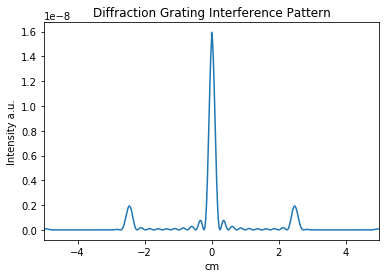

In [10]:
"""
Newman Problem 7.8

Diffraction Gratings
"""
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
from cmath import pi

# constants
alpha = pi/(20*1.e-6)
omega = 200*1.e-6
wavelength = 500*1.e-9
focal_length = 1.
W = 10*omega
N = 1000

# transmission function declaration
def transmission(u):
    return np.sin(alpha*u)**2

# generating us, xs,  & ys
us = np.array([n*W/N-W/2 for n in range(1000)])
xs = np.array([wavelength*focal_length*n/W for n in range(200)])
ys = np.sqrt(transmission(us))

# setting padding elements to zero
ys[np.abs(us) > omega/2] = 0

# calculating intensity 
ck = fft(ys)
I = (W**2/N**2)*np.abs(ck)**2

# generating total x-axis & total Intensity (mirroring and stuff)
x_axis = np.hstack((-1*xs[::-1], xs)).flatten()
Intensities = np.hstack((I[200:0:-1], I[0:200])).flatten()

# plotting
plt.plot(x_axis*100, Intensities)
plt.xlim(-5,5)
plt.xlabel("cm")
plt.ylabel("Intensity a.u.")
plt.title("Diffraction Grating Interference Pattern")
plt.show()



# Newman 7.9 <a id='problem9'/>
### Part A
Write a program that reads in blur.txt and displays the image
### Part B
Write a program that calculates the point spread function over the same area as the blur.txt array, and displays the resulting array as a density plot.
### Part C
Combine the two programs above along with fourier techniques to deblur the image
### Part D
Why can we not perfectly deblur any image?

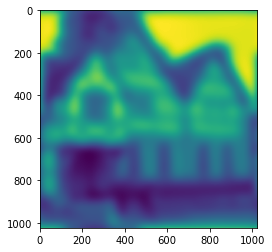

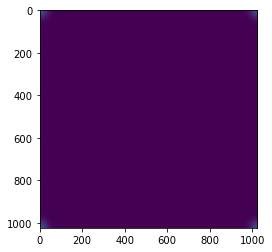

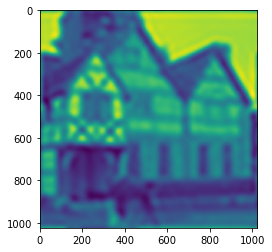

Part D:

    When the numbers calculated by the point spread function are 
    sufficiently small, we lose the ability to accurately store 
    their values as floating point numbers. Becuase of this, the
    fft of the point spread function is not as accurate as it could 
    be in theory, thus the deblurred image is not equivalent to
    the original image.


In [11]:
"""
Newman Problem 7.9

Image Deconvolution
"""
import numpy as np
import matplotlib.pyplot as plt
from math import exp


""" Part A +++++++++++++++++++++++++++++++++++"""

# loading data and displaying image
blur = np.loadtxt('blur.txt')
plt.imshow(blur)
plt.show()

""" Part B +++++++++++++++++++++++++++++++++++"""
from itertools import product

# initialization & constants
sigma = 25
N = len(blur[0])
grid = np.zeros((N, N), float)

# gaussian function
def gaussian(x, y):
    return (exp(-(x*x + y*y)/(2*sigma*sigma)))

# fillout grid with gaussian points
for i in range(N):
    for j in range(N):
        grid[ i, j] += gaussian(i, j)
        grid[-i,-j] += gaussian(i, j)
        grid[-i, j] += gaussian(i, j)
        grid[ i,-j] += gaussian(i, j)

# display grid
plt.imshow(grid)
plt.show()

""" Part C +++++++++++++++++++++++++++++++++++"""
from numpy.fft import rfft2, irfft2

# loading data and displaying image
blur = np.loadtxt('blur.txt')

# fourier transforms
blur_fft = rfft2(blur)
grid_fft = rfft2(grid)

# deal with zeros and find output fourier data
grid_fft[grid_fft < 1.e-12] = 1.e-12
output_fft = blur_fft/grid_fft/1024/1024

# reverse fourier transform and plotting
output = irfft2(output_fft)
plt.imshow(output)
plt.show()

print("Part D:")
print('''
    When the numbers calculated by the point spread function are 
    sufficiently small, we lose the ability to accurately store 
    their values as floating point numbers. Becuase of this, the
    fft of the point spread function is not as accurate as it could 
    be in theory, thus the deblurred image is not equivalent to
    the original image.''')